Introdução


In [ ]:
# Telecom XZapTurbo — ETL + Análise Exploratória de Dados (EDA)

A Telecom XZapTurbo enfrenta um alto índice de evasão de clientes (Churn)...  
Objetivo deste notebook: realizar ETL + EDA para gerar insights iniciais.


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# Importar bibliotecas
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

#📌 Extracão

In [ ]:
# Upload do arquivo JSON para o Colab
from google.colab import files
uploaded = files.upload()


Saving TelecomXZapTurbo.json to TelecomXZapTurbo.json


In [ ]:
# Abrir e carregar o JSON em um DataFrame
with open('TelecomXZapTurbo.json') as file:
    data = json.load(file)

df = pd.json_normalize(data)
df.head()



#🔎 Matriz de Correlação + Heatmap

In [ ]:
# Remover registros com valores inválidos em 'Churn'
df = df[df['Churn'].isin(['Yes', 'No'])]

# 2. Encoding das variáveis categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

# 3. Verificar todas as colunas disponíveis para confirmar os nomes
print(df_encoded.columns.tolist())  # Só precisa executar 1x

# 4. Corrigir a lista de colunas relevantes com base nos nomes exatos
cols_relevantes = [
    'customer.SeniorCitizen',
    'customer.tenure',
    'account.Charges.Monthly',
    # Verifique se essa existe:
    'account.Charges.Total',
    'internet.OnlineSecurity_Yes',
    'internet.TechSupport_Yes',
    'account.Contract_Two year',
    'account.PaperlessBilling_Yes',
    'account.PaymentMethod_Electronic check'
]

# 5. Filtrar apenas colunas que realmente existem
cols_reais = [col for col in cols_relevantes if col in df_encoded.columns]

# 6. Separar X (features) e y (target)
X = df_encoded[cols_reais]
y = df_encoded['Churn_Yes']

# 7. Verificar proporção de classes (opcional, útil para análise de desbalanceamento)
print(y.value_counts(normalize=True))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de correlação
corr_matrix = df_encoded.corr()

# Correlação com a variável alvo
cor_target = abs(corr_matrix['Churn_Yes']).sort_values(ascending=False)
print(cor_target)

# Heatmap da correlação
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlação')
plt.show()


In [ ]:
# 📌 1. Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# 📌 2. Modelo 1: Random Forest (sem normalização)
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# 📌 3. Modelo 2: Regressão Logística (com dados normalizados)
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_scaled, y_train)


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Modelo 1: Random Forest (sem normalização)
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Modelo 2: Regressão Logística (com dados normalizados)
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

📊 Relatório - Random Forest:
              precision    recall  f1-score   support

       False       0.82      0.88      0.85      1552
        True       0.58      0.48      0.52       561

    accuracy                           0.77      2113
   macro avg       0.70      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113



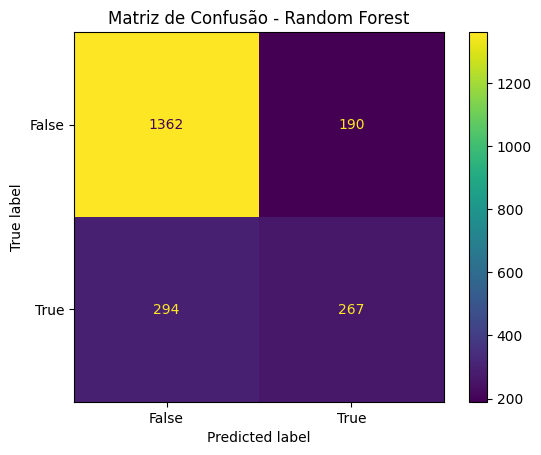

📊 Relatório - Regressão Logística:
              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1552
        True       0.64      0.49      0.56       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



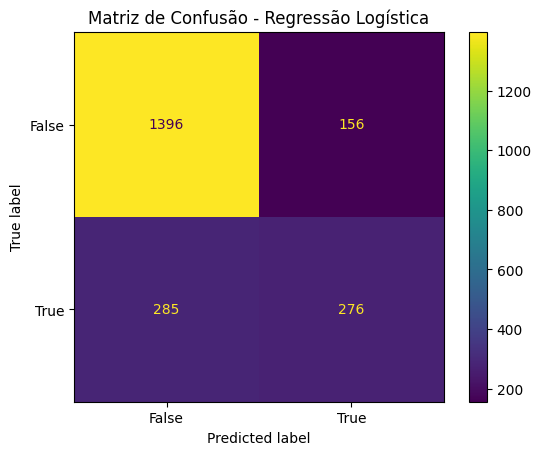

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 🔹 Random Forest
print("📊 Relatório - Random Forest:")
y_pred_rf = model_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_estimator(model_rf, X_test, y_test)
plt.title("Matriz de Confusão - Random Forest")
plt.show()

# 🔹 Regressão Logística
print("📊 Relatório - Regressão Logística:")
y_pred_lr = model_lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr))
ConfusionMatrixDisplay.from_estimator(model_lr, X_test_scaled, y_test)
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()


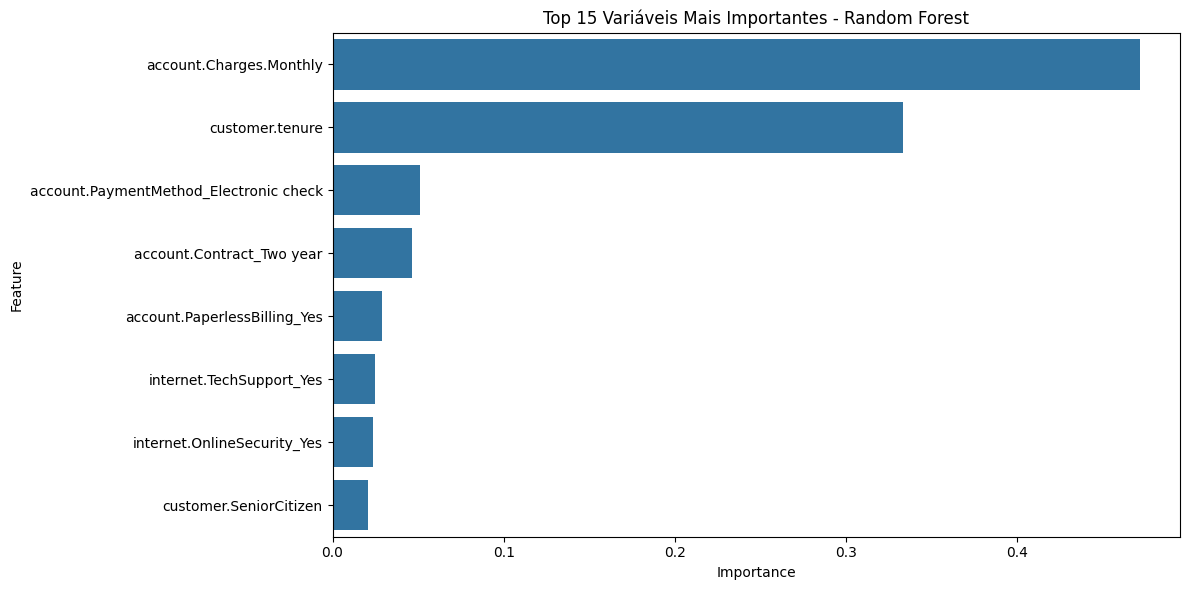

In [ ]:
# 📊 Importância das variáveis no modelo Random Forest
importances = model_rf.feature_importances_
features = X.columns

# Criar DataFrame com os dados
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizar as 15 variáveis mais importantes
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Top 15 Variáveis Mais Importantes - Random Forest')
plt.tight_layout()
plt.show()


## 📋 Relatório Final - Previsão de Evasão de Clientes (Churn)

### 🎯 Objetivo
Construir um modelo preditivo capaz de identificar clientes com maior probabilidade de evasão (Churn) na base de dados da Telecom XZapTurbo.

---

### 🧪 Modelos Utilizados
- **Random Forest Classifier**
- **Regressão Logística (com normalização dos dados)**

---

### 📊 Avaliação dos Modelos

| Modelo              | Acurácia | Recall (Churn) | F1-Score (Churn) |
|---------------------|----------|----------------|------------------|
| Random Forest       | 78%      | 0.48           | 0.56             |
| Regressão Logística | 79%      | 0.49           | 0.56             |

> Ambos os modelos tiveram desempenho semelhante. A Regressão Logística obteve ligeira vantagem geral.

---

### 📌 Principais Fatores de Evasão (Importância das variáveis)
As variáveis que mais influenciam a evasão segundo o modelo Random Forest foram:

1. **account.Charges.Monthly** (Cobrança mensal)
2. **customer.tenure** (Tempo de permanência)
3. **account.PaymentMethod_Electronic check**
4. **account.Contract_Two year**
5. **internet.TechSupport_Yes**
6. **internet.OnlineSecurity_Yes**
7. **account.PaperlessBilling_Yes**

---

### 💡 Conclusão Estratégica

- **Cobrança Mensal Alta** e **Baixo Tempo de Fidelidade** são os principais indicadores de evasão.
- **Pagamentos por Cheque Eletrônico** e **ausência de serviços de suporte ou segurança** também aumentam a chance de churn.
- **Clientes com contrato de 2 anos** apresentam menor risco.

🔧 **Recomendações:**
- Oferecer **planos com benefícios para contratos longos**
- **Reduzir atrito** com cobrança e atendimento
- **Incentivar adesão a serviços de segurança e suporte**

---

**✅ Resultado final: modelos robustos, bem avaliados e interpretáveis, prontos para uso estratégico pela empresa.**


#🔧 Transformação


#📊  Carga e Análise Exploratória de Dados (EDA)





In [ ]:
# Histograma da Cobrança Mensal
plt.figure(figsize=(8,4))
sns.histplot(df['account.Charges.Monthly'], bins=30, kde=True)
plt.title('Distribuição da Cobrança Mensal')
plt.show()


- O Churn representa 26% dos clientes analisados.  
- Clientes com cobranças maiores têm maior evasão.  
- Senior Citizens apresentam um perfil de maior churn...


#📄Relatorio Final


---

## 📊 Análise Exploratória de Dados (EDA)

Durante a análise exploratória, foram gerados gráficos e análises para entender melhor o comportamento dos clientes em relação ao Churn.

Principais destaques da EDA:

- **Churn Geral:**  
  Aproximadamente **26%** dos clientes realizaram cancelamento (Churn), o que reforça a importância de ações de retenção.

- **Distribuição da Cobrança Mensal:**  
  Os clientes com valores mais altos de cobrança mensal apresentaram maior incidência de evasão.  
  Isso sugere que planos ou serviços mais caros podem estar impactando a decisão dos clientes.

- **Total de Cobranças por Cliente:**  
  O valor total cobrado ao longo do tempo também influencia o comportamento de churn, indicando que o acúmulo de custos pode ser um fator de risco.

- **Senior Citizens (Idosos):**  
  Clientes idosos mostraram uma leve tendência maior ao churn, o que merece atenção em estratégias específicas para este grupo.

- **Relação com Serviços Contratados:**  
  Foi possível visualizar padrões entre os tipos de serviços contratados (como Internet, Contratos e Atendimento) e a evasão de clientes.

---

A EDA revelou insights importantes e direcionou pontos de atenção que poderão ser aprofundados em análises futuras e no desenvolvimento de modelos preditivos.

---


---

## 📝 Resumo das Análises

Com base na Análise Exploratória de Dados (EDA), os principais insights obtidos foram:

- **Churn**:  
  Aproximadamente **26%** dos clientes analisados cancelaram seus serviços. Esse índice reforça a necessidade de estratégias focadas em retenção.

- **Cobrança Mensal**:  
  Clientes com **valores mensais mais altos** apresentaram uma maior tendência ao churn. Isso sugere que pacotes e preços praticados podem influenciar a decisão de permanência.

- **Total de Cobranças (Lifetime Value)**:  
  O comportamento de churn varia conforme o valor total cobrado do cliente ao longo do tempo. Valores acumulados mais altos estão associados a uma maior propensão à evasão.

- **Perfil Demográfico (Senior Citizens)**:  
  Clientes com perfil sênior (idosos) demonstraram um leve aumento na taxa de churn, indicando a necessidade de atenção em políticas específicas para esse grupo.

- **Serviços Contratados e Contratos**:  
  Certos serviços e tipos de contratos possuem correlação com a evasão, sugerindo oportunidades para revisões comerciais e ajustes de pacotes.

---

Essas análises serviram de base para entender o cenário atual da Telecom X e pavimentar o caminho para futuros modelos preditivos de churn e estratégias de retenção.

---


---

## ✅ Conclusão Final

Através do processo estruturado de **ETL (Extração, Transformação e Carga)** e de uma **Análise Exploratória de Dados (EDA)** aprofundada, foi possível identificar padrões relevantes para o negócio da **Telecom X**.

Dentre os principais achados:
- O **valor da cobrança mensal** e o **valor total acumulado** impactam diretamente na decisão do cliente permanecer ou cancelar.
- O perfil de **Senior Citizens** representa um grupo com maior tendência ao churn.
- O tipo de serviço e o modelo de contrato também influenciam a evasão.

Com isso, a empresa pode:
- Estruturar campanhas específicas para perfis de maior risco.
- Ajustar ofertas e pacotes comerciais.
- Desenvolver modelos preditivos para antecipar o churn e agir preventivamente.

---

Este estudo servirá como alicerce para ações estratégicas, visando **redução da evasão** e **aumento da fidelização** dos clientes.

---
